<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/PhaseBEhaviourCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Phase behaviour of CO2
#@markdown This notbook gives an introduction to phase behaviour of CO2.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

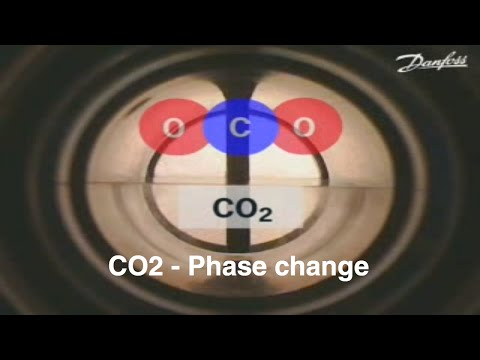

In [2]:
#@title  CO2 Phase Changes
#@markdown Watch the phase-shifts of CO2 recorded at the Danfoss Refrigeration R&D Laboratory, and follow the fascinating transition between solid, liquid, and vapor phases in the pressure chamber and the behavior in the supercritical region.
from IPython.display import YouTubeVideo
YouTubeVideo('zu-S1GxmkCo', width=600, height=400)

In [3]:
#@title  Calculation of vapour pressure of CO2
#@markdown CO2 vapour pressure and phase densities can be calculated using a classic EoS such as the Peng Robinson.
#@markdown

from neqsim.thermo import fluid, TPflash

fluid1 = fluid('pr')
fluid1.addComponent('CO2', 1.0)
fluid1.setPressure(10.0, 'bara')
fluid1.setTemperature(-10.0, 'C')
dewt(fluid1);
fluid1.initProperties()
print('buble point temperature', fluid1.getTemperature('C'), " at ", fluid1.getPressure(), " bara")
print('gas density ', fluid1.getPhase('gas').getDensity())
print('liquid density ', fluid1.getPhase('oil').getDensity())


buble point temperature -39.70469833218792  at  10.0  bara
gas density  25.81462600907981
liquid density  1157.809367873758


#Calculation of CO2-ethane bubble-dew point curves
In the following example we calculate the azeotrope of the CO2-ethane mixture.

In [4]:
from neqsim.thermo import (
    fluid,
    TPflash,
    bubp,
    dewp
)

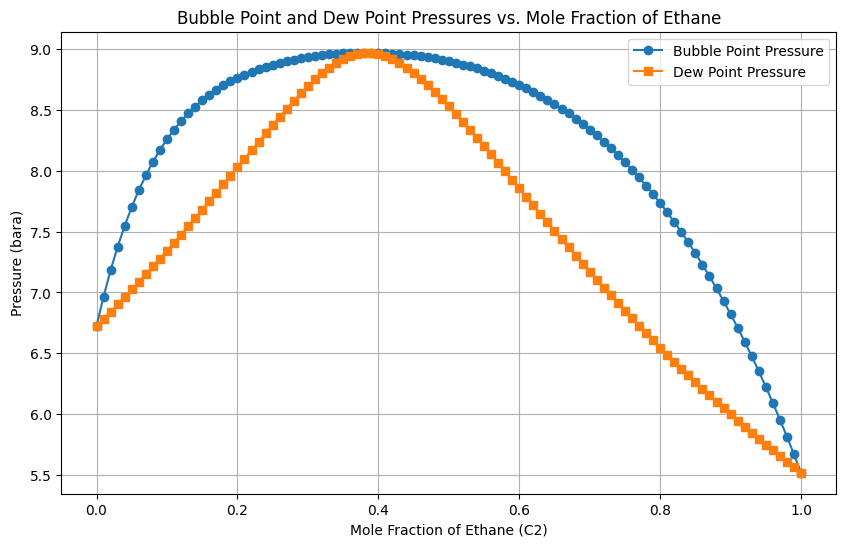

In [5]:
import matplotlib.pyplot as plt
from neqsim.thermo import fluid, bubp, dewp

# Create and configure the fluid
fluid1 = fluid('pr')
fluid1.addComponent('ethane', 1.0)
fluid1.addComponent('CO2', 1.0)
fluid1.setMixingRule('classic')

fluid1.setTemperature(-50.0, 'C')

# Initialize lists to store results
bubpres = []
dewpres = []
molfracC21 = []
molfracC22 = []

# Calculate bubble point temperature
for x in range(0, 101, 1):  # Include x = 1.0 by using range(0, 11)
    fluid1.setMolarComposition([x, 100 - x])
    try:
      bubpres.append(bubp(fluid1))
      molfracC21.append(x/100)
    except:
      pass

# Calculate dew point pressures
for x in range(0, 101, 1):
    fluid1.setMolarComposition([x, 100 - x])
    try:
      dewpres.append(dewp(fluid1))
      molfracC22.append(x/100)
    except:
      pass

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(molfracC21, bubpres, label='Bubble Point Pressure', marker='o')
plt.plot(molfracC22, dewpres, label='Dew Point Pressure', marker='s')
plt.xlabel('Mole Fraction of Ethane (C2)')
plt.ylabel('Pressure (bara)')
plt.title('Bubble Point and Dew Point Pressures vs. Mole Fraction of Ethane')
plt.legend()
plt.grid(True)
plt.show()

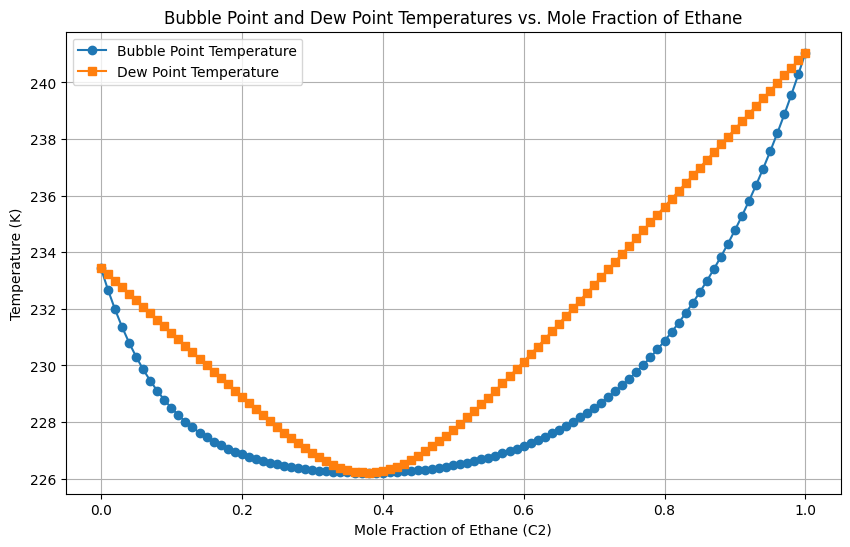

In [6]:
import matplotlib.pyplot as plt
from neqsim.thermo import fluid, bubt, dewt

# Create and configure the fluid
fluid1 = fluid('pr')
fluid1.addComponent('ethane', 1.0)
fluid1.addComponent('CO2', 1.0)
fluid1.setMixingRule('classic')

fluid1.setPressure(10.0, 'bara')
fluid1.setTemperature(-50.0, 'C')

# Initialize lists to store results
bubtemp = []
dewtemp = []
molfracC21 = []
molfracC22 = []

# Calculate bubble point temperature
for x in range(0, 101, 1):  # Include x = 1.0 by using range(0, 11)
    fluid1.setMolarComposition([x, 100 - x])
    try:
      bubtemp.append(bubt(fluid1))
      molfracC21.append(x/100)
    except:
      pass

# Calculate dew point pressures
for x in range(0, 101, 1):
    fluid1.setMolarComposition([x, 100 - x])
    try:
      dewtemp.append(dewt(fluid1))
      molfracC22.append(x/100)
    except:
      pass

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(molfracC21, bubtemp, label='Bubble Point Temperature', marker='o')
plt.plot(molfracC22, dewtemp, label='Dew Point Temperature', marker='s')
plt.xlabel('Mole Fraction of Ethane (C2)')
plt.ylabel('Temperature (K)')
plt.title('Bubble Point and Dew Point Temperatures vs. Mole Fraction of Ethane')
plt.legend()
plt.grid(True)
plt.show()